<a href="https://colab.research.google.com/github/AvantiShri/colab_notebooks/blob/master/Hao_Demo_Kaggle_Cancer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We load in the "Cancer Data" file from the Kaggle machine learning dataset repository

In [ ]:
import pandas as pd

df = pd.read_csv('Cancer_Data.csv').drop('Unnamed: 32', axis=1)

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


We plot the correlations between the features...there are several highly correlated features...

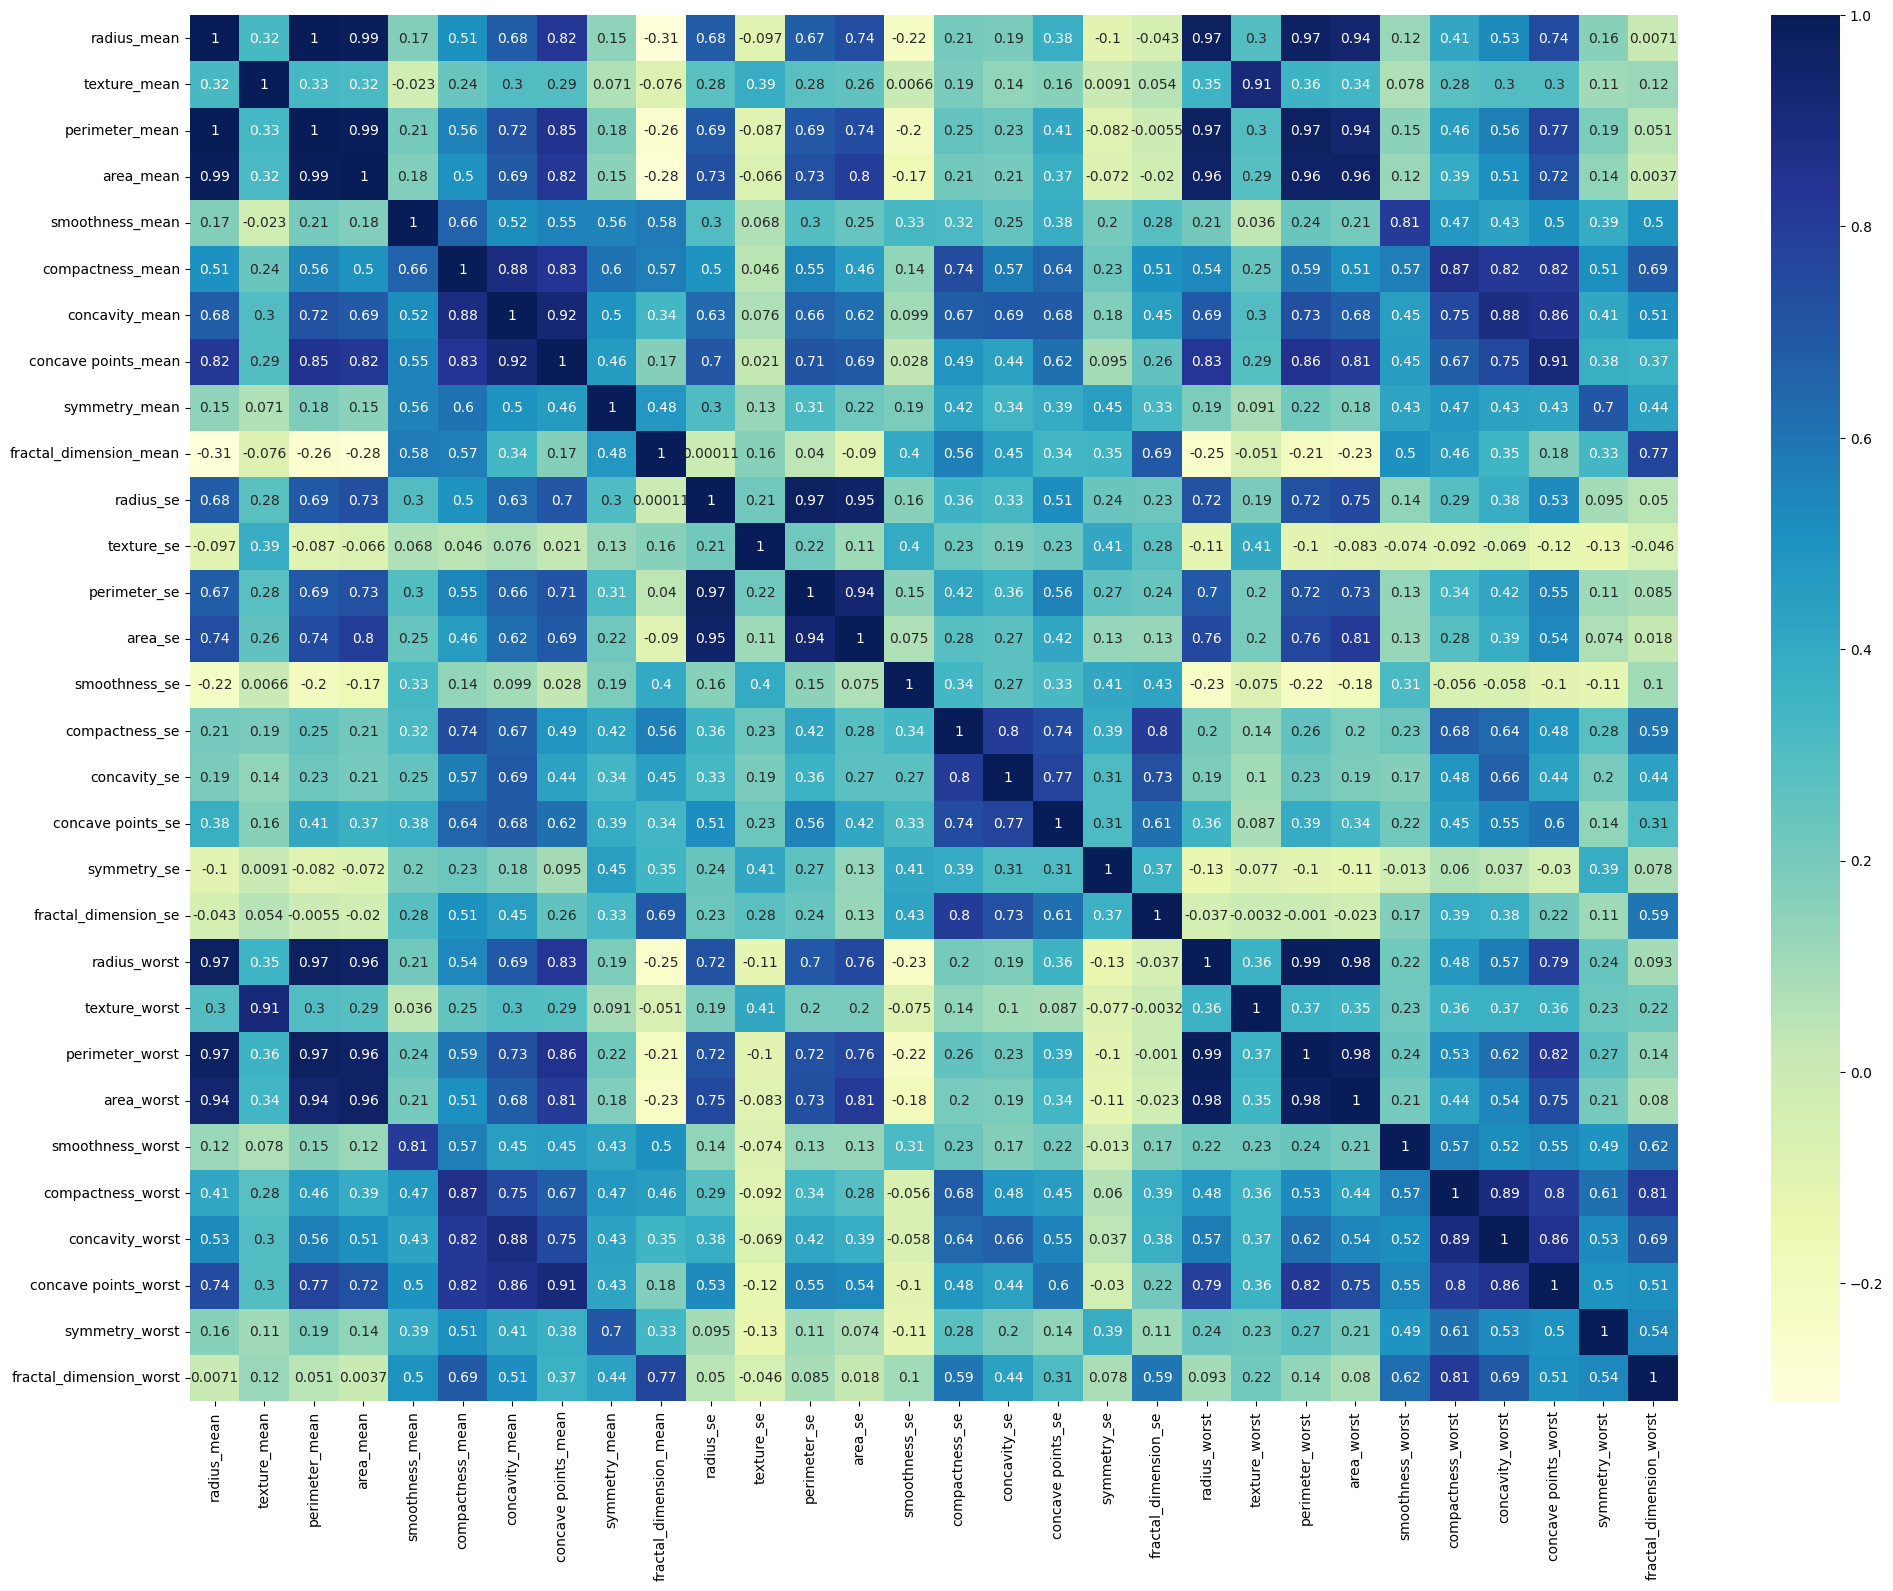

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 18))
co_mtx = df.drop('id', axis=1).corr(numeric_only=True)
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
plt.show()

The results of machine learning models are easier to interpret, and also less prone to "overfitting", when the number of features is smaller. We will reduce features by dropping any feature that is more than 80% correlated with an earlier feature in the list (in practice, you would want to retain the one that is more predictive of the outcome, but we will us a simple solution for now)

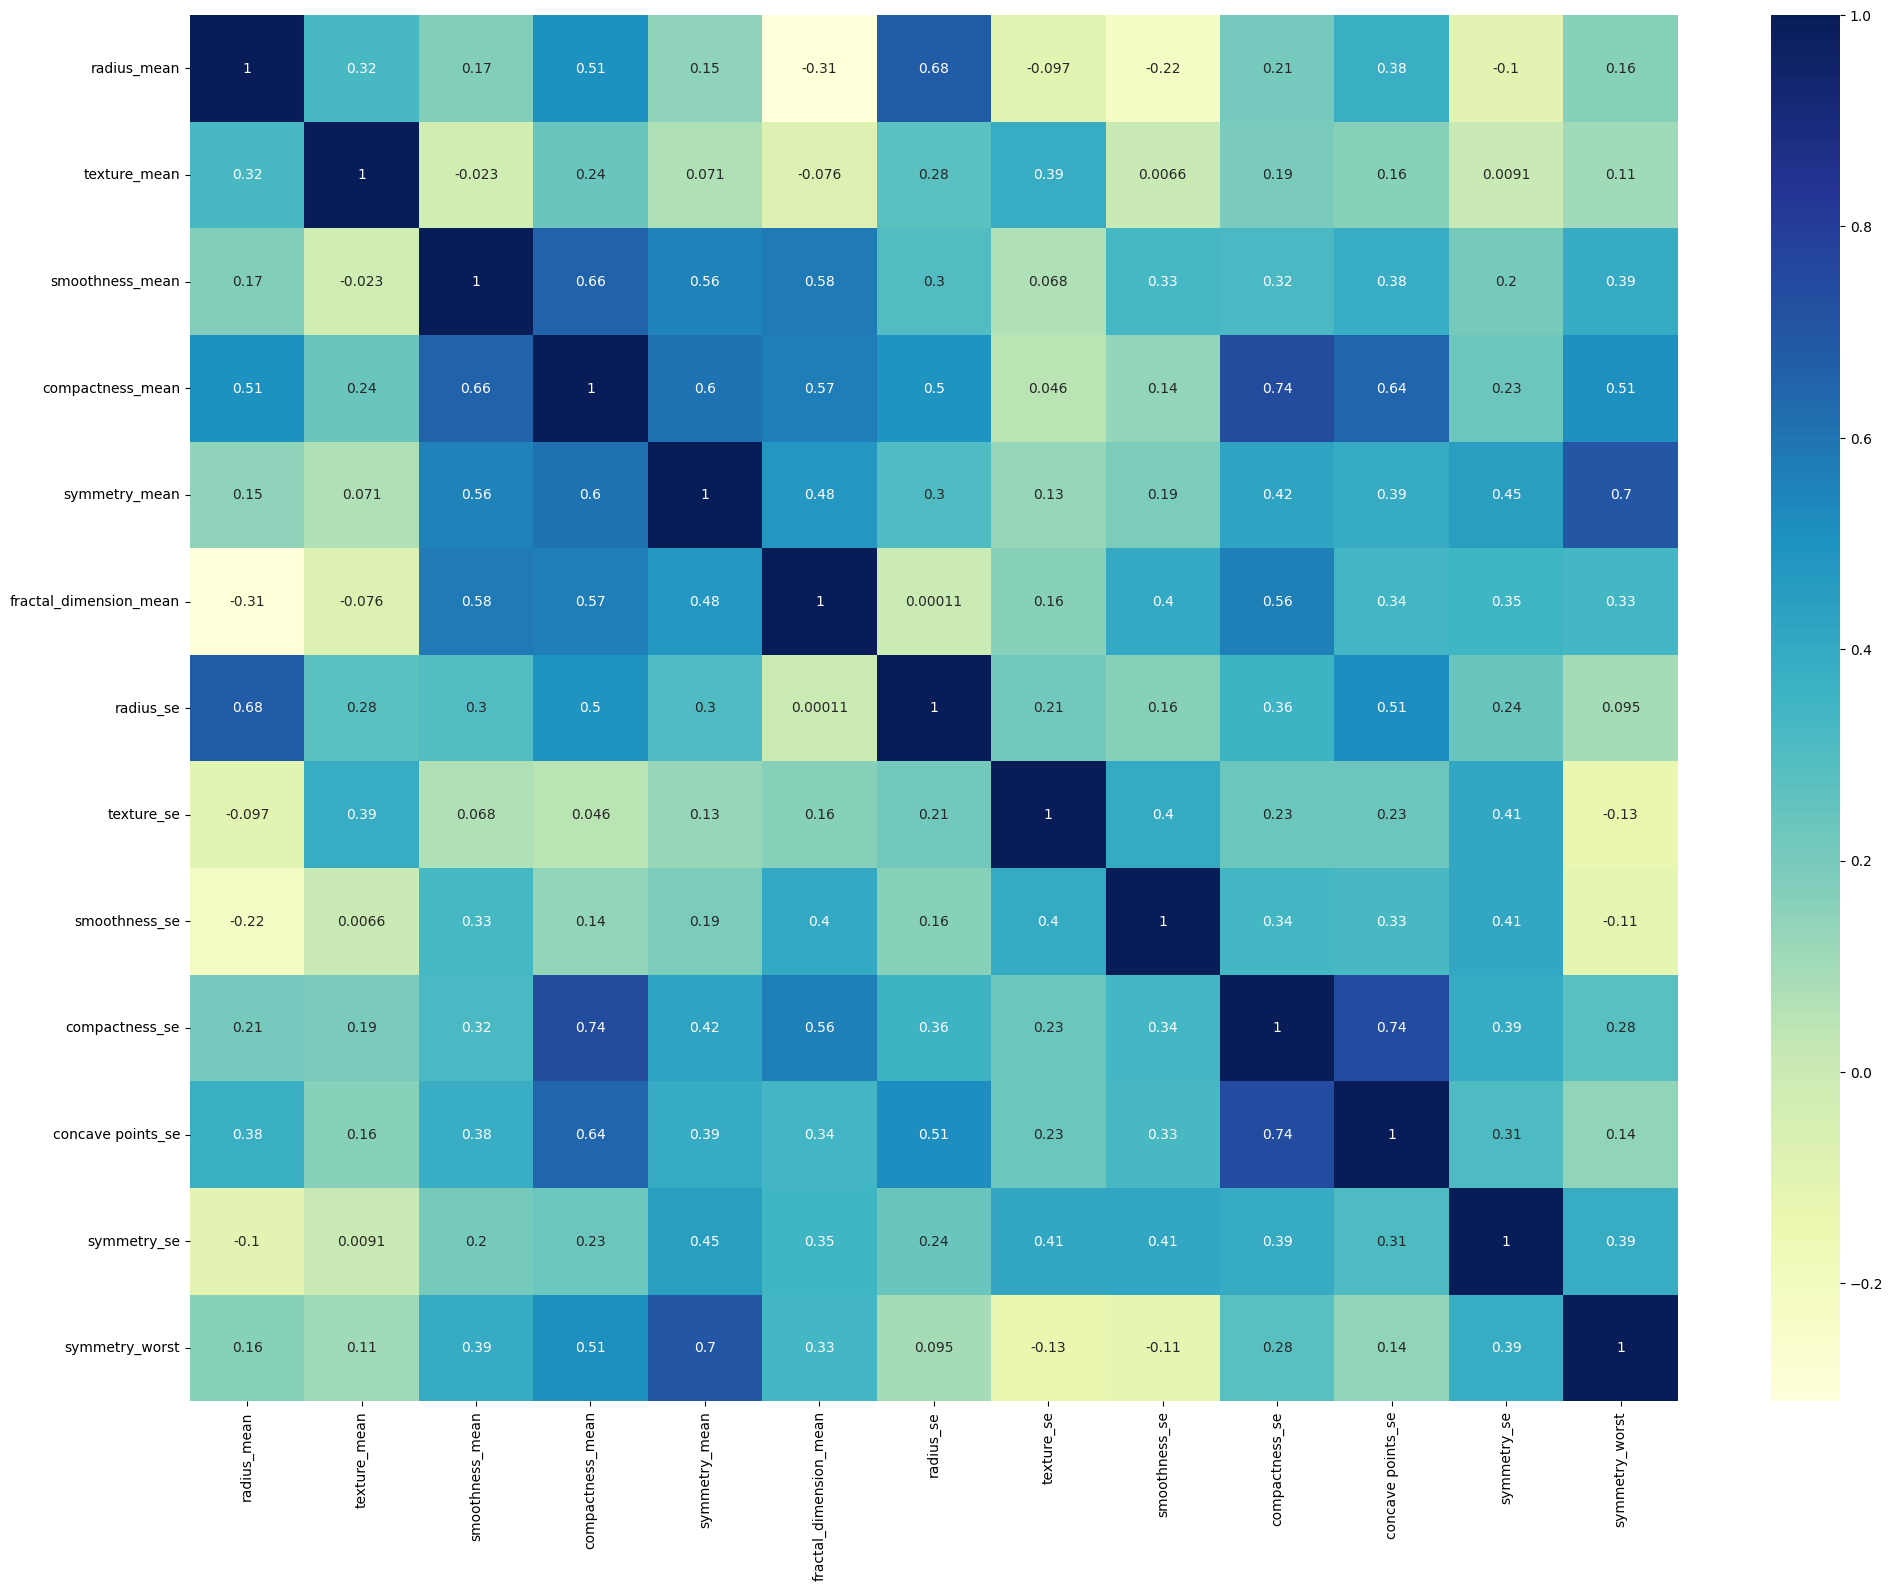

In [ ]:
import numpy as np

corr_matrix = df.corr(numeric_only=True)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]+['id']
df_reduced = df.drop(to_drop, axis=1)

plt.figure(figsize=(24, 18))
co_mtx = df_reduced.corr(numeric_only=True)
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
plt.show()

Now train the model

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

diagnosis_binary = {'B':1,'M':0}

df_reduced['diagnosis_Coded'] = df_reduced['diagnosis'].map(diagnosis_binary)
df_reduced = df_reduced.drop('diagnosis', axis =1)

#Prepare the features and the thing to predict
X = df_reduced.drop('diagnosis_Coded', axis=1)
y = df_reduced['diagnosis_Coded']

#Split into training and test sets (20% in test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train a "gradient boosted" tree-based classifier
model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:14:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

Evaluate the model on the test set

In [ ]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Inspect the model to see what it learned!

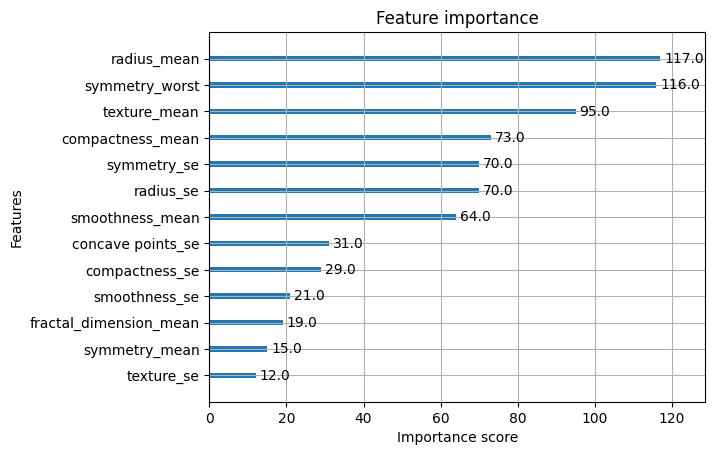

In [ ]:
xgb.plot_importance(model)
plt.show()


ML pitfalls:

Reporting only "accuracy" when there is a lot of class imbalance!
- If 95% of the samples had been benign, simply predicting "benign" for everythign would have resulted in 95% accuracy!

Not using a held-out set!
- Performance reflects overfitting (chance associations that may be present in ane dataset but don't generalize to newer datsets)
- If the dataset is small, use leave-one-out cross validation.
- Also consider using regularization, which penalizes learning more complex models...but beware of tuning the regularization level maximize test-set performance! That's a form of training (called "hyperparameter tuning") on your test-set!

Too many features!
- Prone to overfitting to the training set.
- Solutions: "regularization" (penalizing the model for using too many features), feature selection (be careful to select features on the training set only!), dimensionality reduction

Selecting the features according to the *whole* dataset (rather than just the training set).
- It's a form of training on your testing set!
- Particularly important when there are LOTS of features e.g. with SNPs. Some SNPs will be correlated with the disease in your dataset BY CHANCE, and if you pick only those to train your model *prior* to splitting your dataset into a test set, your test-set performance will reflect the cherry-picking of features.

Cherry-picking the best type of model according to performance on the test set!
- Use a separate split ("validation set") to choose the best type of model

Batch effects!
- Be aware of variation in your dataset that is due to how the dataset was gathered, rather than the effect you're trying to capture!
- E.g. if images your cases and controls are gathered in different centers, there may be variation in the dataset that reflects the scanner settings at the different centers, rather than underlying biology!
- Visualizing the features learned by the models can shed light on this


## Unsupervised: discover clusters using the input features alone

In [86]:
import numpy as np
import pandas as pd
import altair as alt
from sklearn.manifold import TSNE
from functools import reduce
import operator

def _pick_perplexity(n, default=30):
    # t-SNE needs 1 < perplexity < n-1; a practical upper bound is ~n/3
    upper = max(2, (n - 1) // 3)
    return int(np.clip(default, 2, upper))

def tsne_embed(X: pd.DataFrame, random_state: int = 0, perplexity: int | None = None) -> np.ndarray:
    if perplexity is None:
        perplexity = _pick_perplexity(len(X))
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        learning_rate="auto",
        init="pca",
        random_state=random_state,
    )
    return tsne.fit_transform(X.values)

def dashboard_tsne_and_pairwise(
    X: pd.DataFrame,
    y,                                # true labels
    key_feature: str = "radius_mean",
    random_state: int = 0,
    perplexity: int | None = None,
    total_width: int = 900,
    total_height: int = 900,
    tsne_height_frac: float = 0.5,    # keep full width; just control height
    fontsize: int = 20,
    pad_guess: int = 45,
):
    if key_feature not in X.columns:
        raise ValueError(f"`key_feature`='{key_feature}' not in X.columns")

    # --- data ---
    y = pd.Series(y, index=X.index)
    # remap labels: 1 -> benign, 0 -> malignant
    label_map = {1: "benign", 0: "malignant"}
    label = y.map(label_map).astype("category")
    emb = tsne_embed(X, random_state=random_state, perplexity=perplexity)

    df = X.copy()
    df["tsne_axis1"] = emb[:, 0]
    df["tsne_axis2"] = emb[:, 1]
    df["label"] = label
    df["row_id"] = np.arange(len(df))
    feature_cols = X.columns.tolist()

    others = [c for c in feature_cols if c != key_feature]
    first6, last6 = others[:6], others[6:12]

    alt.data_transformers.disable_max_rows()

    # --- selections ---
    BRUSH = alt.selection_interval(name="BRUSH", empty="all")
    HOVER = alt.selection_point(fields=["row_id"], on="mouseover", nearest=True, empty=False)

    color_enc = alt.condition(
        BRUSH,
        alt.Color("label:N", title=None, sort=["benign", "malignant"]),
        alt.value("lightgray")
    )

    # --- layout sizing (make widths consistent) ---
    cols = 6
    h_spacing = 8
    inner_width = total_width - (fontsize + pad_guess)     # usable width for charts
    tsne_w = inner_width*1.3
    tsne_h = total_height * tsne_height_frac - (fontsize + pad_guess)

    # choose each cell width so that: cols*cell_w + (cols-1)*h_spacing == inner_width
    cell_w = (inner_width - (cols - 1) * h_spacing) / cols
    cell_h = (total_height * (1 - tsne_height_frac)) / 2 - (fontsize + pad_guess)

    # --- t-SNE ---
    tsne_chart = (
        alt.Chart(df)
        .mark_point()
        .encode(
            x=alt.X("tsne_axis1:Q", title="t-SNE 1"),
            y=alt.Y("tsne_axis2:Q", title="t-SNE 2"),
            color=color_enc,
            tooltip=["row_id:Q", "label:N"] + [
                (alt.Tooltip(c, type="quantitative") if np.issubdtype(X[c].dtype, np.number)
                 else alt.Tooltip(c, type="nominal")) for c in feature_cols
            ],
            size=alt.condition(HOVER, alt.value(80), alt.value(50)),
            opacity=alt.value(1.0),
        )
        .add_params(BRUSH, HOVER)
        .properties(width=tsne_w, height=tsne_h, title="t-SNE")
    )

    # --- pairwise base ---
    base_pair = (
        alt.Chart(df)
        .mark_point()
        .encode(
            color=color_enc,
            tooltip=["row_id:Q", "label:N",
                     alt.Tooltip(f"{key_feature}:Q", title=key_feature)],
            opacity=alt.value(1.0),
            size=alt.condition(HOVER, alt.value(70), alt.value(50)),
        )
        .add_params(BRUSH, HOVER)
        .properties(width=cell_w, height=cell_h)
    )

    def pair_plot(yfeat: str) -> alt.Chart:
        return base_pair.encode(
            x=alt.X(f"{key_feature}:Q", title=key_feature),
            y=alt.Y(f"{yfeat}:Q", title=yfeat)
        )

    # two explicit rows of 6
    row1 = alt.hconcat(*[pair_plot(f) for f in first6], spacing=h_spacing) if first6 else None
    row2 = alt.hconcat(*[pair_plot(f) for f in last6], spacing=h_spacing) if last6 else None
    pairwise_block = alt.vconcat(*(r for r in [row1, row2] if r is not None), spacing=8)

    # --- compose ---
    chart = alt.vconcat(tsne_chart, pairwise_block, spacing=10).configure_axis(
        labelFontSize=fontsize,
        titleFontSize=fontsize
    ).properties(padding=0, spacing=0)

    return chart

In [87]:
dashboard_tsne_and_pairwise(X=X, y=y, perplexity=30)

alt.VConcatChart(...)